In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set global plotting parameters
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

In [7]:
# Load and clean in one step
df = pd.read_csv("retail_sales_dataset.csv")
df.columns = df.columns.str.replace(" ", "_")
df["Date"] = pd.to_datetime(df["Date"])

# Create Age Groups for better demographic insight
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 30, 45, 70], labels=["Young", "Middle-Aged", "Senior"])

print(f"Data Loaded: {df.shape[0]} transactions.")
df.head(3)

Data Loaded: 1000 transactions.


,Transaction_ID,Date,Customer_ID,Gender,Age,Product_Category,Quantity,Price_per_Unit,Total_Amount,Age_Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Middle-Aged
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Young
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Senior


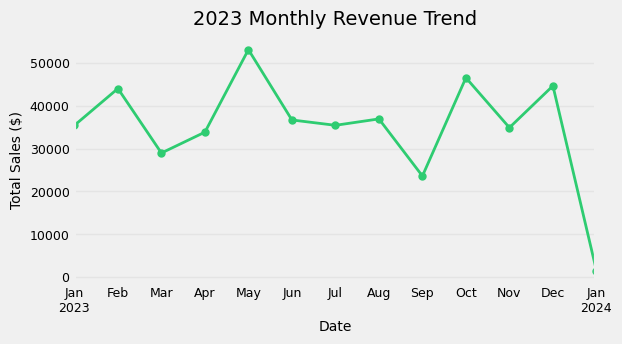

In [12]:
plt.figure(figsize=(6, 3))
# Resample to Month-End (ME) and sum revenue
monthly_sales = df.set_index('Date').resample('ME')['Total_Amount'].sum()

monthly_sales.plot(marker='o', color='#2ecc71', linewidth=2, markersize=5)
plt.title("2023 Monthly Revenue Trend", pad=10)
plt.ylabel("Total Sales ($)")
plt.grid(True, alpha=0.3)
plt.show()

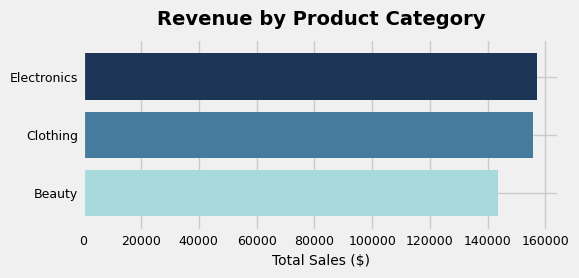

In [ ]:
plt.figure(figsize=(6, 3))
# Group and sort data
cat_data = df.groupby("Product_Category")["Total_Amount"].sum().sort_values()

# Using a visible, professional blue palette (No white bars)
colors = ['#A8DADC', '#457B9D', '#1D3557'] 

cat_data.plot(kind='barh', color=colors, width=0.8)
plt.title("Revenue by Product Category", pad=10, fontweight='bold')
plt.xlabel("Total Sales ($)")
plt.ylabel("")
plt.grid(False) 
plt.tight_layout()
plt.show()

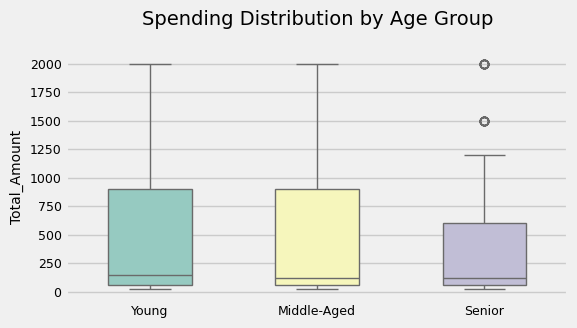

In [16]:
plt.figure(figsize=(6, 3.5))
sns.boxplot(x="Age_Group", y="Total_Amount", data=df, palette="Set3", width=0.5)
plt.title("Spending Distribution by Age Group", pad=20)
plt.xlabel("")
plt.tight_layout()
plt.show()

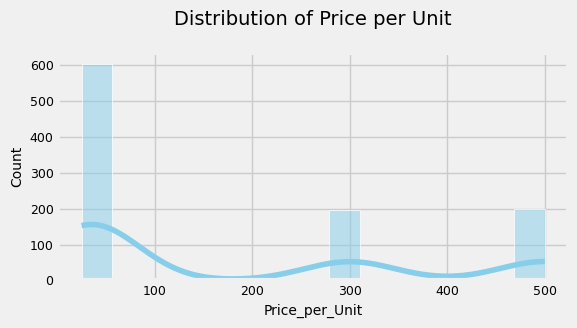

In [17]:
plt.figure(figsize=(6, 3.5))
sns.histplot(df["Price_per_Unit"], bins=15, kde=True, color="skyblue", edgecolor="white")
plt.title("Distribution of Price per Unit", pad=20)
plt.tight_layout()
plt.show()

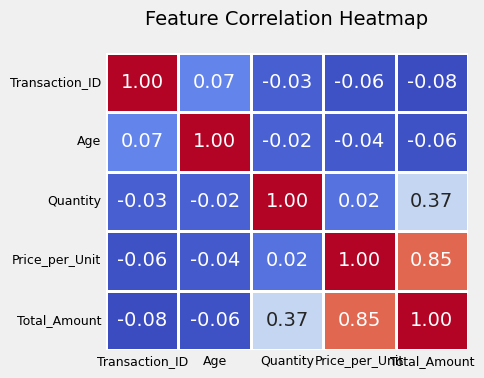

In [18]:
plt.figure(figsize=(5, 4))
# Select only numeric columns for correlation to avoid errors
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, cbar=False)
plt.title("Feature Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

In [15]:
# Extract key metrics
top_cat = cat_data.idxmax()
top_month = monthly_sales.idxmax().strftime('%B')
avg_val = df["Total_Amount"].mean()

print("--- CLIENT INSIGHT CARD CONTENT ---")
print(f"Insight 1: Peak revenue was achieved in {top_month}, suggesting a seasonal sales peak.")
print(f"Insight 2: {top_cat} is the dominant category, outperforming others in total value.")
print(f"Insight 3: The average transaction size is ${avg_val:.2f} across all demographics.")
print(f"\nRecommendation: Increase marketing focus on '{top_cat}' and prepare inventory \nfor the {top_month} peak to maximize year-over-year growth.")

--- CLIENT INSIGHT CARD CONTENT ---
Insight 1: Peak revenue was achieved in May, suggesting a seasonal sales peak.
Insight 2: Electronics is the dominant category, outperforming others in total value.
Insight 3: The average transaction size is $456.00 across all demographics.

Recommendation: Increase marketing focus on 'Electronics' and prepare inventory 
for the May peak to maximize year-over-year growth.
